In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl


# Reading data


In [ ]:
data = pd.read_csv("US.csv")
data

,City,State,Date,Maximum_Temperature,Minimum_Temperature,Temperature,Wind_Chill,Heat_Index,Precipitation,Snow_Depth,Wind_Speed,Wind_Gust,Cloud_Cover,Relative_Humidity,Conditions
0,Houston,Texas,07-01-2020,89.7,80.7,84.4,NaN,100.5,0.0,NaN,20.8,15.0,59.4,76.83,Partially cloudy
1,Houston,Texas,07-02-2020,93.8,80.7,85.7,NaN,99.5,0.0,NaN,12.4,13.9,48.3,71.48,Partially cloudy
2,Houston,Texas,07-03-2020,93.6,78.9,84.4,NaN,99.8,0.0,NaN,21.2,19.7,35.8,69.71,Partially cloudy
3,Houston,Texas,07-04-2020,93.5,77.3,84.7,NaN,99.4,0.0,NaN,8.8,13.9,20.8,69.04,Clear
4,Houston,Texas,07-05-2020,93.5,77.4,84.0,NaN,98.1,0.0,NaN,11.3,16.1,23.9,73.25,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,Hamilton,North Carilona,07/27/2020,95.7,76.3,85.9,NaN,104.3,0.0,NaN,10.5,19.7,12.0,67.86,Clear
2830,Hamilton,North Carilona,07/28/2020,96.4,73.2,82.9,NaN,104.7,1.6,NaN,11.3,19.7,20.3,74.34,"Rain, Clear"
2831,Hamilton,North Carilona,07/29/2020,87.9,72.5,78.9,NaN,96.9,0.0,NaN,9.0,NaN,25.0,83.77,Clear
2832,Hamilton,North Carilona,07/30/2020,88.9,71.6,80.3,NaN,99.2,0.0,NaN,10.4,NaN,28.5,82.23,Partially cloudy


In [ ]:
data.shape


(2834, 15)

In [ ]:
len(data)

2834

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 2825 non-null   object 
 1   State                2825 non-null   object 
 2   Date                 2825 non-null   object 
 3   Maximum_Temperature  2825 non-null   float64
 4   Minimum_Temperature  2825 non-null   float64
 5   Temperature          2825 non-null   float64
 6   Wind_Chill           55 non-null     float64
 7   Heat_Index           1978 non-null   float64
 8   Precipitation        2825 non-null   float64
 9   Wind_Speed           2825 non-null   float64
 10  Wind_Gust            1868 non-null   float64
 11  Cloud_Cover          2825 non-null   float64
 12  Relative_Humidity    2791 non-null   float64
 13  Conditions           2825 non-null   object 
dtypes: float64(10), object(4)
memory usage: 310.1+ KB


# Data cleaning 


In [ ]:
data.fillna(0)

,City,State,Date,Maximum_Temperature,Minimum_Temperature,Temperature,Wind_Chill,Heat_Index,Precipitation,Wind_Speed,Wind_Gust,Cloud_Cover,Relative_Humidity,Conditions
0,Houston,Texas,07-01-2020,89.7,80.7,84.4,0.0,100.5,0.0,20.8,15.0,59.4,76.83,Partially cloudy
1,Houston,Texas,07-02-2020,93.8,80.7,85.7,0.0,99.5,0.0,12.4,13.9,48.3,71.48,Partially cloudy
2,Houston,Texas,07-03-2020,93.6,78.9,84.4,0.0,99.8,0.0,21.2,19.7,35.8,69.71,Partially cloudy
3,Houston,Texas,07-04-2020,93.5,77.3,84.7,0.0,99.4,0.0,8.8,13.9,20.8,69.04,Clear
4,Houston,Texas,07-05-2020,93.5,77.4,84.0,0.0,98.1,0.0,11.3,16.1,23.9,73.25,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,Hamilton,North Carilona,07/27/2020,95.7,76.3,85.9,0.0,104.3,0.0,10.5,19.7,12.0,67.86,Clear
2830,Hamilton,North Carilona,07/28/2020,96.4,73.2,82.9,0.0,104.7,1.6,11.3,19.7,20.3,74.34,"Rain, Clear"
2831,Hamilton,North Carilona,07/29/2020,87.9,72.5,78.9,0.0,96.9,0.0,9.0,0.0,25.0,83.77,Clear
2832,Hamilton,North Carilona,07/30/2020,88.9,71.6,80.3,0.0,99.2,0.0,10.4,0.0,28.5,82.23,Partially cloudy


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 2825 non-null   object 
 1   State                2825 non-null   object 
 2   Date                 2825 non-null   object 
 3   Maximum_Temperature  2825 non-null   float64
 4   Minimum_Temperature  2825 non-null   float64
 5   Temperature          2825 non-null   float64
 6   Wind_Chill           55 non-null     float64
 7   Heat_Index           1978 non-null   float64
 8   Precipitation        2825 non-null   float64
 9   Wind_Speed           2825 non-null   float64
 10  Wind_Gust            1868 non-null   float64
 11  Cloud_Cover          2825 non-null   float64
 12  Relative_Humidity    2791 non-null   float64
 13  Conditions           2825 non-null   object 
dtypes: float64(10), object(4)
memory usage: 310.1+ KB


In [ ]:
data.fillna(data.Heat_Index.mean(),inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 2834 non-null   object 
 1   State                2834 non-null   object 
 2   Date                 2834 non-null   object 
 3   Maximum_Temperature  2834 non-null   float64
 4   Minimum_Temperature  2834 non-null   float64
 5   Temperature          2834 non-null   float64
 6   Wind_Chill           2834 non-null   float64
 7   Heat_Index           2834 non-null   float64
 8   Precipitation        2834 non-null   float64
 9   Wind_Speed           2834 non-null   float64
 10  Wind_Gust            2834 non-null   float64
 11  Cloud_Cover          2834 non-null   float64
 12  Relative_Humidity    2834 non-null   float64
 13  Conditions           2834 non-null   object 
dtypes: float64(10), object(4)
memory usage: 310.1+ KB


In [ ]:
data

,City,State,Date,Maximum_Temperature,Minimum_Temperature,Temperature,Wind_Chill,Heat_Index,Precipitation,Wind_Speed,Wind_Gust,Cloud_Cover,Relative_Humidity,Conditions
0,Houston,Texas,07-01-2020,89.7,80.7,84.4,93.662892,100.5,0.0,20.8,15.000000,59.4,76.83,Partially cloudy
1,Houston,Texas,07-02-2020,93.8,80.7,85.7,93.662892,99.5,0.0,12.4,13.900000,48.3,71.48,Partially cloudy
2,Houston,Texas,07-03-2020,93.6,78.9,84.4,93.662892,99.8,0.0,21.2,19.700000,35.8,69.71,Partially cloudy
3,Houston,Texas,07-04-2020,93.5,77.3,84.7,93.662892,99.4,0.0,8.8,13.900000,20.8,69.04,Clear
4,Houston,Texas,07-05-2020,93.5,77.4,84.0,93.662892,98.1,0.0,11.3,16.100000,23.9,73.25,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,Hamilton,North Carilona,07/27/2020,95.7,76.3,85.9,93.662892,104.3,0.0,10.5,19.700000,12.0,67.86,Clear
2830,Hamilton,North Carilona,07/28/2020,96.4,73.2,82.9,93.662892,104.7,1.6,11.3,19.700000,20.3,74.34,"Rain, Clear"
2831,Hamilton,North Carilona,07/29/2020,87.9,72.5,78.9,93.662892,96.9,0.0,9.0,93.662892,25.0,83.77,Clear
2832,Hamilton,North Carilona,07/30/2020,88.9,71.6,80.3,93.662892,99.2,0.0,10.4,93.662892,28.5,82.23,Partially cloudy


In [ ]:
len(data)

2834

# Feature selection

In [ ]:
Maximum_Temperature = data.iloc[0:2834,3:4].values
Minimum_Temperature = data.iloc[0:2834,4:5].values
Temperature = data.iloc[0:2834,5:6].values
Wind_Chill = data.iloc[0:2834,6:7].values
Heat_Index = data.iloc[0:2834,7:8].values
Precipitation = data.iloc[0:2834,8:9].values
Wind_Speed = data.iloc[0:2834,9:10].values
Wind_Gust = data.iloc[0:2834,10:11].values
Cloud_Cover = data.iloc[0:2834,11:12].values
Relative_Humidity = data.iloc[0:2834,12:13].values


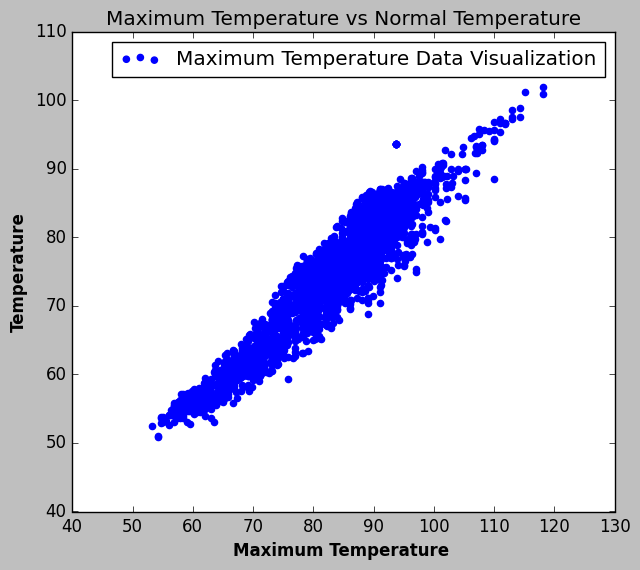

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Maximum_Temperature, Temperature, label="Maximum Temperature Data Visualization", color="blue")
plt.xlabel("Maximum Temperature ", weight="bold")
plt.ylabel("Temperature", weight="bold")
plt.title("Maximum Temperature vs Normal Temperature")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Max_Temp.jpg')


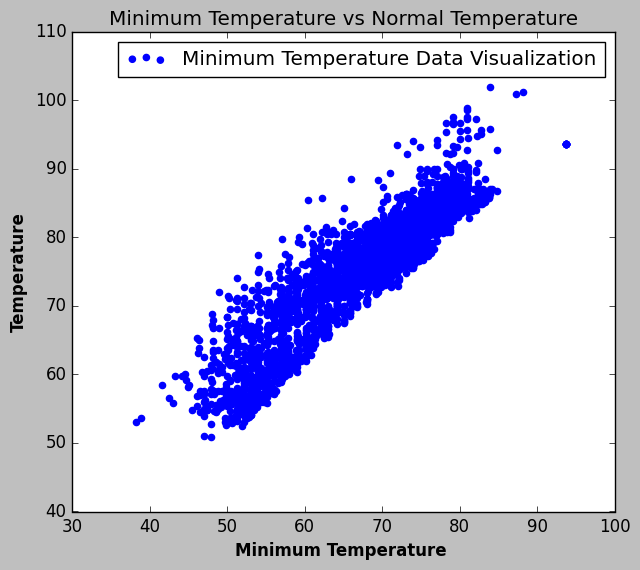

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Minimum_Temperature, Temperature, label="Minimum Temperature Data Visualization", color="blue")
plt.xlabel("Minimum Temperature ", weight="bold")
plt.ylabel("Temperature", weight="bold")
plt.title("Minimum Temperature vs Normal Temperature")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Min_Temp.jpg')


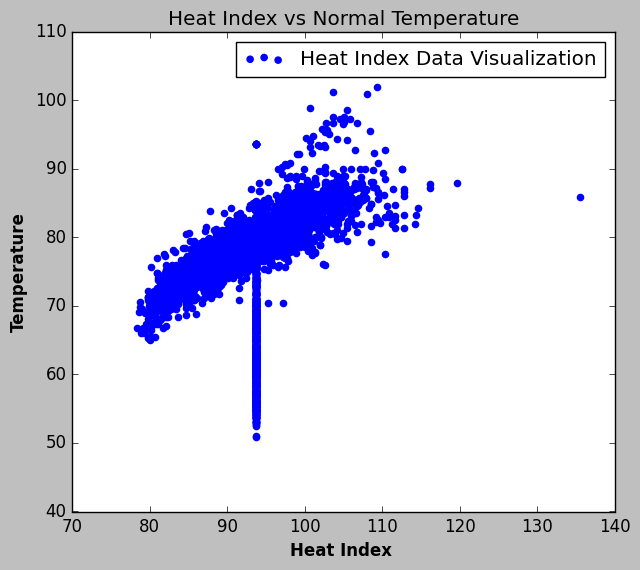

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Heat_Index, Temperature, label="Heat Index Data Visualization", color="blue")
plt.xlabel("Heat Index ", weight="bold")
plt.ylabel("Temperature", weight="bold")
plt.title("Heat Index vs Normal Temperature")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Heat_Index_Temp.jpg')


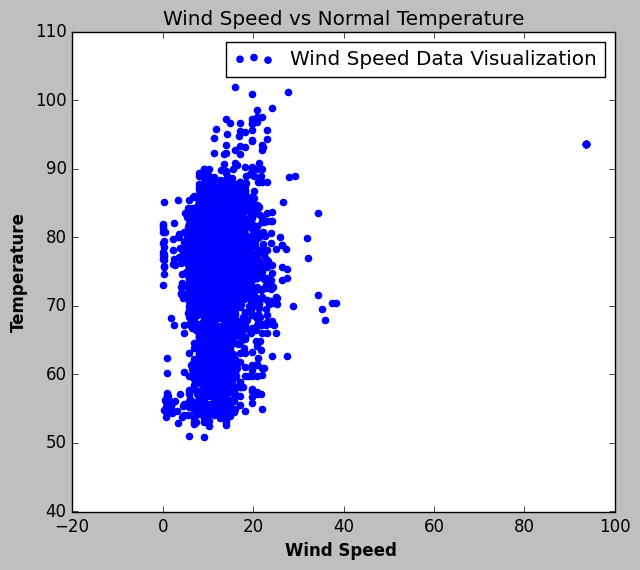

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Wind_Speed, Temperature, label="Wind Speed Data Visualization", color="blue")
plt.xlabel("Wind Speed ", weight="bold")
plt.ylabel("Temperature", weight="bold")
plt.title("Wind Speed vs Normal Temperature")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Wind_Speed_Temp.jpg')


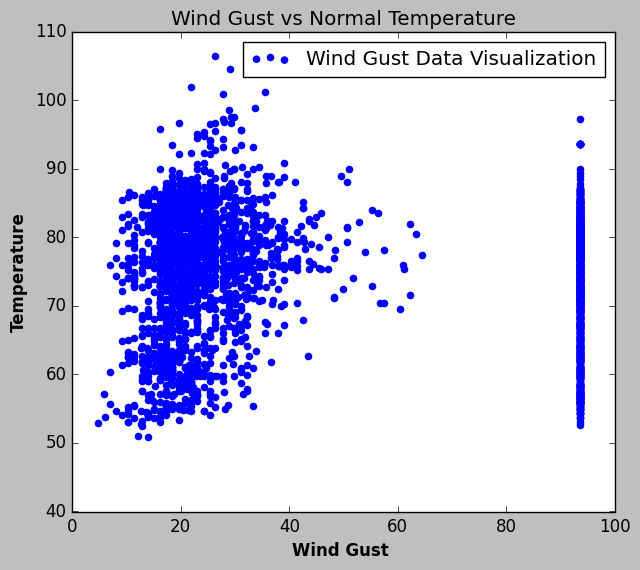

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Wind_Gust, Temperature, label="Wind Gust Data Visualization", color="blue")
plt.xlabel("Wind Gust ", weight="bold")
plt.ylabel("Temperature", weight="bold")
plt.title("Wind Gust vs Normal Temperature")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Wind_Gust_Temp.jpg')


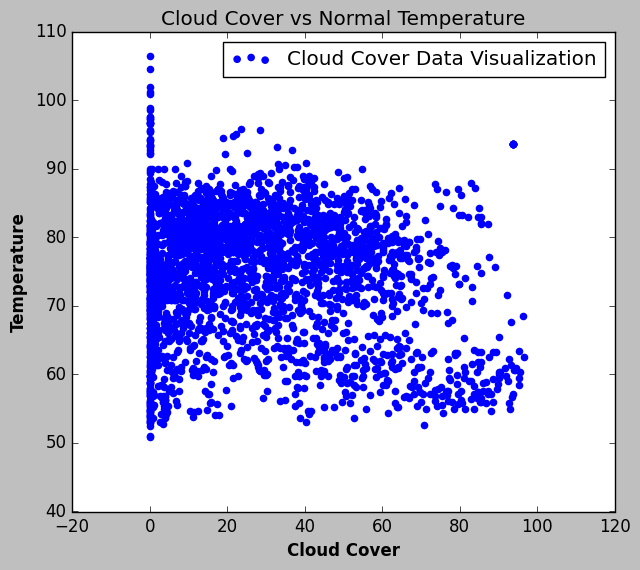

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Cloud_Cover, Temperature, label="Cloud Cover Data Visualization", color="blue")
plt.xlabel("Cloud Cover", weight="bold")
plt.ylabel("Temperature", weight="bold")
plt.title("Cloud Cover vs Normal Temperature")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Cloud_Cover_Temp.jpg')


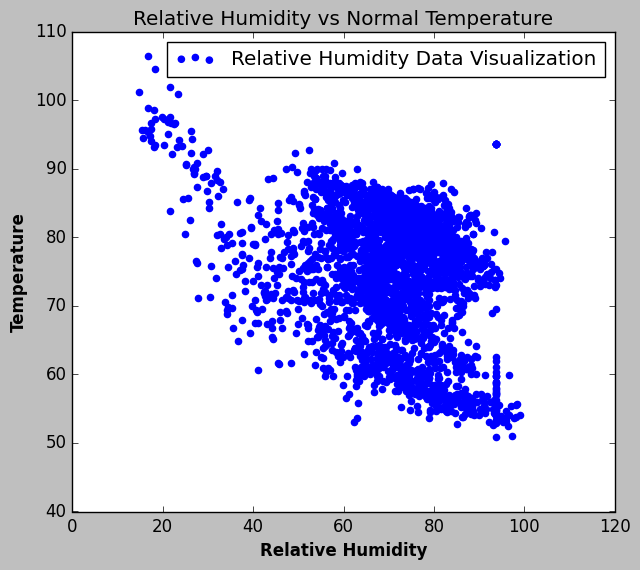

In [ ]:
plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Relative_Humidity, Temperature, label="Relative Humidity Data Visualization", color="blue")
plt.xlabel("Relative Humidity", weight="bold")
plt.ylabel("Temperature", weight="bold")
plt.title("Relative Humidity vs Normal Temperature")
plt.legend()

mpl.rcParams.update({'font.size':14})
plt.savefig('Relative_Humidity_Temp.jpg')


In [ ]:
Temperature_train,Temperature_test, Relative_Humidity_train, Relative_Humidity_test = train_test_split(Temperature, Relative_Humidity, test_size=1/3, random_state=100)


In [ ]:
print("no of training data", len(Temperature_train))
print("no of testing data", len(Temperature_test))
print("no of AQI training data", len(Relative_Humidity_train))
print("no of AQI testing data", len(Relative_Humidity_test))

no of training data 1889
no of testing data 945
no of AQI training data 1889
no of AQI testing data 945


In [ ]:
ht_lr = LinearRegression()

In [ ]:
ht_lr.fit(Temperature_train, Relative_Humidity_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ht_lr.score(Temperature_train, Relative_Humidity_train) #Training Accuracy

0.11968704838056843

In [ ]:
ht_lr.score(Temperature_test, Relative_Humidity_test) #Testing Accuracy

0.08970441305007515

In [ ]:
ht_lr.score(Temperature, Relative_Humidity) #overall processed data

0.10989586650363792

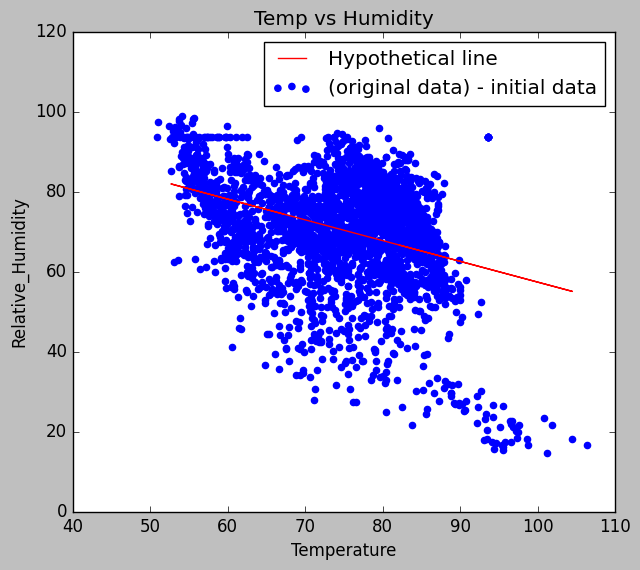

In [ ]:

plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Temperature, Relative_Humidity, label="(original data) - initial data", color="blue")
plt.plot(Temperature_test, ht_lr.predict(Temperature_test), color="red", label="Hypothetical line")
plt.xlabel("Temperature")
plt.ylabel("Relative_Humidity")
plt.title("Temp vs Humidity")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('Temp_Hum_Prediction_visualization.jpg')


In [ ]:
Temperature_train,Temperature_test, Maximum_Temperature_train, Maximum_Temperature_test = train_test_split(Temperature, Maximum_Temperature, test_size=1/3, random_state=100)


In [ ]:
print("no of training data", len(Temperature_train))
print("no of testing data", len(Temperature_test))
print("no of AQI training data", len(Maximum_Temperature_train))
print("no of AQI testing data", len(Maximum_Temperature_test))

no of training data 1889
no of testing data 945
no of AQI training data 1889
no of AQI testing data 945


In [ ]:
ht_lr.fit(Temperature_train, Maximum_Temperature_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ht_lr.score(Temperature_train, Maximum_Temperature_train) #Training Accuracy

0.8969547286010376

In [ ]:
ht_lr.score(Temperature_test, Maximum_Temperature_test) #Testing Accuracy

0.8954940890922348

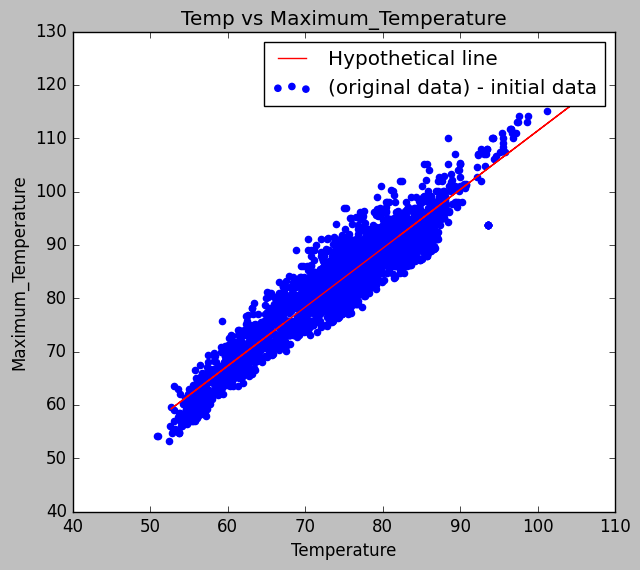

In [ ]:

plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Temperature, Maximum_Temperature, label="(original data) - initial data", color="blue")
plt.plot(Temperature_test, ht_lr.predict(Temperature_test), color="red", label="Hypothetical line")
plt.xlabel("Temperature")
plt.ylabel("Maximum_Temperature")
plt.title("Temp vs Maximum_Temperature")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('Temp_Maximum_Temperature_Prediction_visualization.jpg')


In [ ]:
Temperature_train,Temperature_test, Minimum_Temperature_train, Minimum_Temperature_test = train_test_split(Temperature, Minimum_Temperature, test_size=1/3, random_state=100)


In [ ]:
print("no of training data", len(Temperature_train))
print("no of testing data", len(Temperature_test))
print("no of AQI training data", len(Minimum_Temperature_train))
print("no of AQI testing data", len(Minimum_Temperature_test))

no of training data 1889
no of testing data 945
no of AQI training data 1889
no of AQI testing data 945


In [ ]:
ht_lr.fit(Temperature_train, Minimum_Temperature_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ht_lr.score(Temperature_train, Minimum_Temperature_train) #Training Accuracy

0.8197326187924254

In [ ]:
ht_lr.score(Temperature_test, Minimum_Temperature_test) #Testing Accuracy

0.8343899651311845

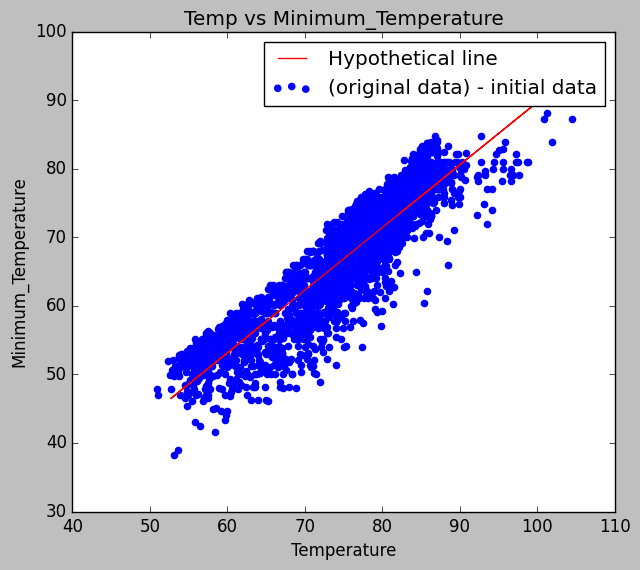

In [ ]:

plt.figure(figsize=(7,6), dpi=100)
plt.style.use('classic')
plt.scatter(Temperature, Minimum_Temperature, label="(original data) - initial data", color="blue")
plt.plot(Temperature_test, ht_lr.predict(Temperature_test), color="red", label="Hypothetical line")
plt.xlabel("Temperature")
plt.ylabel("Minimum_Temperature")
plt.title("Temp vs Minimum_Temperature")
plt.legend()
mpl.rcParams.update({'font.size':14})
plt.savefig('Temp_Minimum_Temperature_Prediction_visualization.jpg')


In [ ]:
pred = ht_lr.predict(Relative_Humidity_test)

In [ ]:
pred

array([[66.39673592],
       [74.13856263],
       [65.62895145],
       [69.9797301 ],
       [64.69664174],
       [71.22280971],
       [60.21789902],
       [71.38733496],
       [50.00819366],
       [59.36785193],
       [72.87720244],
       [31.66362906],
       [66.57040145],
       [78.23341312],
       [83.91217721],
       [51.40665822],
       [64.02940048],
       [55.67517425],
       [58.47210338],
       [38.48228636],
       [64.79718495],
       [25.87782469],
       [60.79373737],
       [59.6054995 ],
       [73.99231797],
       [73.48046166],
       [70.509867  ],
       [29.57050236],
       [52.72286017],
       [69.23022622],
       [56.09562765],
       [53.39010143],
       [69.39475146],
       [72.32878496],
       [55.97680386],
       [66.08596602],
       [32.66906111],
       [56.90911357],
       [57.31128639],
       [66.53384029],
       [28.24516013],
       [26.39882129],
       [65.9945631 ],
       [59.16676552],
       [72.96860535],
       [71

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(Temperature_test,pred)

In [ ]:
MSE

458.1849827840817

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

21.40525596165768

In [ ]:
pred = ht_lr.predict(Minimum_Temperature_test)

In [ ]:
MSE = mean_squared_error(Temperature_test,pred)

In [ ]:
MSE

257.01775995721465

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

16.031773450158738

In [ ]:
pred = ht_lr.predict(Maximum_Temperature_test)

In [ ]:
MSE = mean_squared_error(Temperature_test,pred)

In [ ]:
MSE

9.909001541381478

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
RMSE

3.147856658328247